In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 불필요한 경고문 생략(선택)
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)

# 데이터 로드
data = pd.read_csv('Churn_Modelling.csv',index_col=0)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [3]:
# data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  EstimatedSalary  10002 non-null  float64
 12  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [4]:
# 결측치 확인 및 제거(4개 행 제거)

data.isnull().sum()
nan_data = data.dropna()


In [5]:
# 중복 값 행 검색 및 행 삭제
nan_data[nan_data.duplicated()]

new_data = nan_data[~nan_data.duplicated()]

new_data
new_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


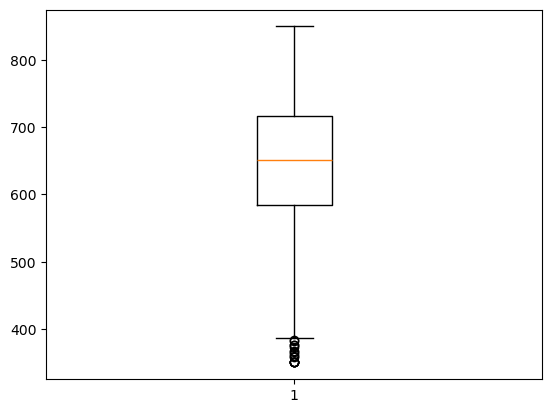

In [6]:
# RAW EDA : 각 지표 별 그래프 작성 및 확인

plt.boxplot(new_data['CreditScore'])
plt.show() #CreditScore에서 너무 작은 값 다수 존재, 해당 인원들의 이탈여부 확인 예정

In [7]:
# 위 그래프의 이상치들은 전부 이탈 : 신용 점수가 너무 낮은 인원은 이탈한다 볼 수 있다.
IQR = new_data['CreditScore'].quantile(q=0.75) - new_data['CreditScore'].quantile(q=0.25)
min = new_data['CreditScore'].quantile(q=0.25) - 1.5*IQR
print(f"사분위수 이상치 판독 최소값 기준 : {min}")

new_data[new_data['CreditScore'] < min]['Exited']

사분위수 이상치 판독 최소값 기준 : 384.125


RowNumber
8       1
943     1
1194    1
1406    1
1632    1
1839    1
1963    1
2474    1
2580    1
5495    1
8155    1
8724    1
8763    1
9211    1
9357    1
9625    1
Name: Exited, dtype: int64

In [8]:
# 연령, 잔고를 통한 고객 상태 확인 : 연령대 그룹화 진행
# new_data['Age_Group'] = (new_data['Age'] // 10) * 10
# exit_data = new_data[new_data['Exited'] == 1]

# sns.scatterplot(data=exit_data, x='Age_Group', y='Balance')

In [9]:
# 성별, 국가 범주형 변수에서 수치형 변수로 인코딩 시작(France = 0, Germany = 1, Spain = 2 / Female = 0, male = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Gender'] = le.fit_transform(new_data["Gender"])
new_data['Geography'] = le.fit_transform(new_data["Geography"])

new_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
6,15574012,Chu,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,0,1,39.0,5,0.00,2,1.0,0.0,96270.64,0
9997,15569892,Johnstone,516,0,1,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,15584532,Liu,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1


<Axes: >

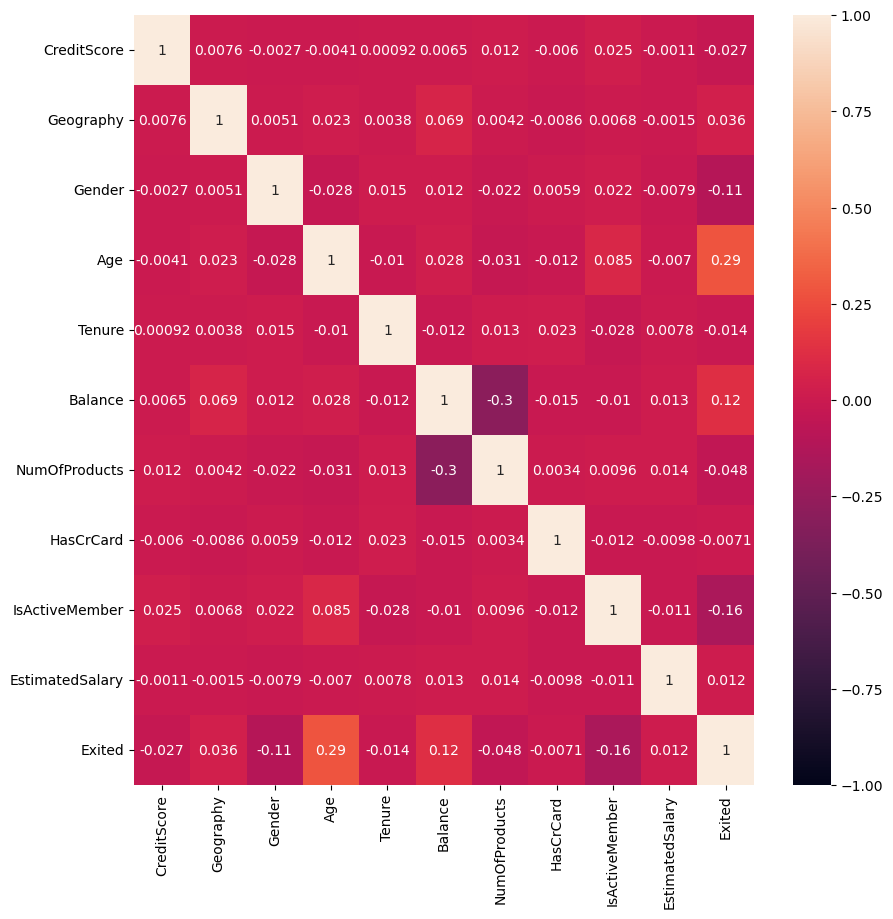

In [10]:
# 목표변수, 범주형 자료 제외하고 변수 간 상관관계 확인, heatmap 사용 : 수치형 자료 사이에는 큰 상관관계 존재 X

int_data = new_data.drop(columns=['CustomerId', 'Surname'])
int_data.corr(method='pearson')

import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(int_data.corr(), annot=True, vmin=-1, vmax=1)

In [11]:
# 다중공산성 확인 : 각 변수가 다른 독립 변수 전체와의 상관 관계 강도, 10이 넘어가면 다중공산성이 높아 원하는 결과가 나오기 힘들다고 예측 가능, 제거하는 것이 이상적
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["변수명"] = int_data.columns
vif["VIF"] = [variance_inflation_factor(int_data.values, i) for i in range(int_data.shape[1])]

vif

,변수명,VIF
0,CreditScore,21.245890
1,Geography,1.817719
2,Gender,2.190801
3,Age,13.683214
4,Tenure,3.874255
5,Balance,2.678220
6,NumOfProducts,7.733859
7,HasCrCard,3.289197
8,IsActiveMember,2.150453
9,EstimatedSalary,3.888129


In [12]:
# 로지스틱 회귀 결과 해석을 위한 함수 지정 및 변수 분류
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, average_precision_score, confusion_matrix
def get_att(x):
    # x모델 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

def get_metrics(true, pred):
    print('정확도', round(accuracy_score(true, pred), 4))
    print('f1-score', round(f1_score(true, pred), 4))


X = int_data.drop("Exited", axis=1)
y_true = int_data[['Exited']]


In [13]:
# 전체 데이터(수치형)에 대한 로지스틱 회귀 진행

model_lor = LogisticRegression()

model_lor.fit(X, y_true)
get_att(model_lor)

y_pred = model_lor.predict(X)
get_metrics(y_true, y_pred)
print("Recall:", recall_score(y_true, y_pred))

클래스 종류 [0 1]
독립변수 갯수 10
들어간 독립변수(x)의 이름 ['CreditScore' 'Geography' 'Gender' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary']
가중치 [[-4.46690805e-03  3.21071739e-03 -3.81236625e-02  4.52715615e-02
  -8.26622609e-02  3.92358135e-06 -2.60897104e-02 -1.11618460e-02
  -5.72113997e-02 -9.46887002e-07]]
바이어스 [-0.0139003]
정확도 0.7912
f1-score 0.1146
Recall: 0.0662739322533137


In [14]:
# 성별 간 로지스틱 회귀 분석 진행

sex_data = new_data.drop(columns=['CustomerId', 'Surname'])
male_data = sex_data[sex_data['Gender'] == 1]
female_data = sex_data[sex_data['Gender'] == 0]

X_male = male_data[['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age','Geography']]
y_true_male = male_data[['Exited']]

model_lor.fit(X_male, y_true_male)
get_att(model_lor)

y_pred_male = model_lor.predict(X_male)
get_metrics(y_true_male, y_pred_male)
print("Recall:", recall_score(y_true_male, y_pred_male))


클래스 종류 [0 1]
독립변수 갯수 8
들어간 독립변수(x)의 이름 ['CreditScore' 'Tenure' 'Balance' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Age' 'Geography']
가중치 [[-4.92665714e-03 -6.93191405e-02  3.85863803e-06 -8.52932642e-03
  -4.40277407e-02 -1.76403665e-06  4.48969228e-02  1.76622516e-03]]
바이어스 [-0.01063905]
정확도 0.8291
f1-score 0.047
Recall: 0.025612472160356347


In [15]:
X_female = female_data[['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Geography']]
y_true_female = female_data[['Exited']]

model_lor.fit(X_female, y_true_female)
get_att(model_lor)

y_pred_female = model_lor.predict(X_female)
get_metrics(y_true_female, y_pred_female)
print("Recall:", recall_score(y_true_female, y_pred_female))


클래스 종류 [0 1]
독립변수 갯수 8
들어간 독립변수(x)의 이름 ['CreditScore' 'Tenure' 'Balance' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Age' 'Geography']
가중치 [[-4.37165083e-03 -5.94730237e-02  3.66918072e-06 -8.96028690e-03
  -4.64292081e-02 -8.52851360e-07  4.67517448e-02  3.96612274e-03]]
바이어스 [-0.01128602]
정확도 0.751
f1-score 0.2107
Recall: 0.13257243195785778


- 데이터 스케일링
    - 정규화 진행 : 표준화 진행시 -1 ~ 1 사이 값을 가짐으로, 일부 범주형 변수를 처리한 0, 1과 같은 양의 정수 값들과 분석 상의 오류 발생 가능성 있음.
    - 데이터에서 평균을 뺀 후, 변수에서의 최대값에서 최소값을 뺀 값으로 나눈다

In [16]:
# 데이터 엔지니어링(결측치 제거 후 전체 데이터셋 기준), 30:70 으로 훈련 셋과 테스트셋 분할

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mms = MinMaxScaler()

target_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

scaled_X = pd.DataFrame(data = X)
scaled_X[target_features] = mms.fit_transform(X[target_features])


X_train, X_test, y_train, y_test = train_test_split(X,y_true, test_size = 0.3, random_state= 42)

scaled_X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,0.538,0,0,0.324324,2,0.000000,1,1.0,1.0,0.506735
2,0.516,2,0,0.310811,1,0.334031,1,0.0,1.0,0.562709
3,0.304,0,0,0.324324,8,0.636357,3,1.0,0.0,0.569654
4,0.698,0,0,0.283784,1,0.000000,2,0.0,0.0,0.469120
6,0.590,2,1,0.351351,8,0.453394,2,1.0,0.0,0.748797


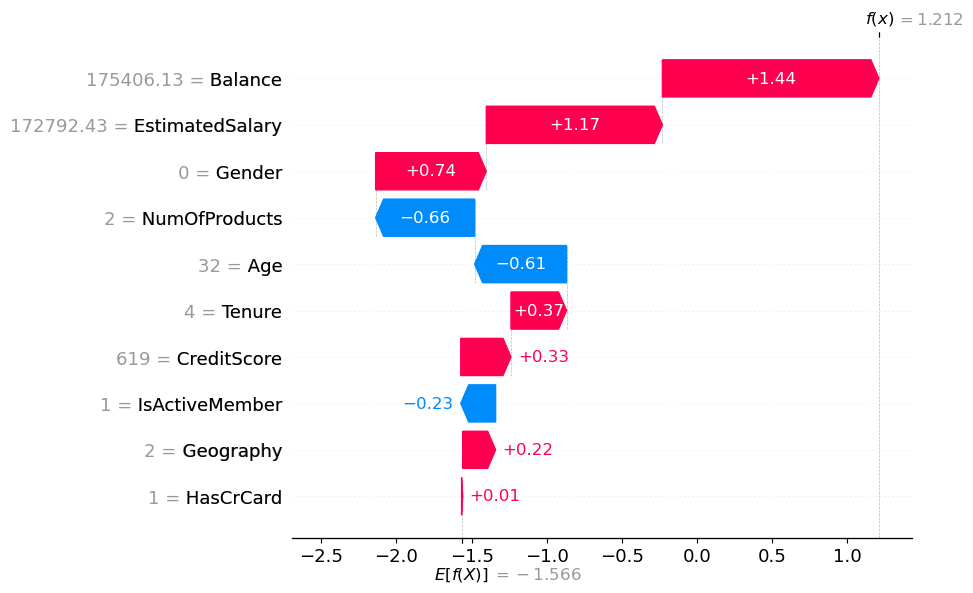

train 정확도 : 0.963
Recall: 0.8381219341275403
test 정확도 : 0.847
Recall: 0.47540983606557374


In [17]:
# SHAP를 통한 각 항목별 이탈률 기여도 확인, 사용 모델은 XGBoost 회귀 모델
# !pip install shap
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import shap

model_xg = XGBClassifier(random_state = 42)
model_xg.fit(X_train, y_train)

ex = shap.Explainer(model_xg)
shap_v = ex(X_train)

shap.plots.waterfall(shap_v[0])

y_train_pred = model_xg.predict(X_train)
print(f'train 정확도 : {accuracy_score(y_train, y_train_pred):.3f}')
print("Recall:", recall_score(y_train, y_train_pred))

y_test_pred = model_xg.predict(X_test)
print(f'test 정확도 : {accuracy_score(y_test, y_test_pred):.3f}')
print("Recall:", recall_score(y_test, y_test_pred))




In [18]:
# Over Sampling 수행
from imblearn.over_sampling import SMOTE
X = scaled_X
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y_true)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.3, random_state=42)

model_xg.fit(X_train, y_train)

y_pred = model_xg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

#confusion Matrix
confusion_matrix(y_test, y_pred)

Accuracy: 0.8823283082077052
Precision: 0.8966578715919086
Recall: 0.8617920540997465
F1: 0.8788793103448276
Area under precision (AUC) Recall: 0.8411999656673147


array([[2175,  235],
       [ 327, 2039]], dtype=int64)

In [21]:
# 하이퍼 파라미터 튜닝 : GridSearch 사용
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_search_model = GridSearchCV(
    estimator=model_xg,
    param_grid=parameters,
    cv=3,
    refit=True
)
grid_search_model.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search_model.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022005,0.002161,0.004001,8.165348e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.786484,0.803716,0.816370,0.802190,0.012249,5
1,0.023005,0.000817,0.005001,8.167294e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.786484,0.803716,0.816370,0.802190,0.012249,5
2,0.024005,0.001633,0.004334,4.714266e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.836295,0.847334,0.855950,0.846527,0.008045,3
3,0.023672,0.000943,0.004001,2.247832e-07,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.836295,0.847334,0.855950,0.846527,0.008045,3
4,0.026673,0.000471,0.004334,4.712018e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.849488,0.863220,0.864567,0.859092,0.006813,1
5,0.027006,0.000817,0.004334,4.716513e-04,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.849488,0.863220,0.864567,0.859092,0.006813,1


In [25]:
print('GridSearchCV 최적 파라미터:', grid_search_model.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search_model.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_search_model.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
print('테스트 데이터 세트 recall: {0:.4f}'.format(recall_score(y_test, pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8591
테스트 데이터 세트 정확도: 0.8712
테스트 데이터 세트 recall: 0.8521
